https://pypi.org/project/emnist/

and then fitted EMNIST to

https://www.kaggle.com/code/nishan192/mnist-digit-recognition-using-svm/notebook

notbook currently only running digits. Need to add in letters too!!

In [1]:
!pip install emnist

In [2]:
  from emnist import list_datasets
  list_datasets()
  #['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [3]:
from emnist import extract_training_samples
train_images, train_labels = extract_training_samples('digits')
train_images.shape

(240000, 28, 28)

In [4]:
from emnist import extract_test_samples
test_images, test_labels = extract_test_samples('digits')
print(test_images.shape)
print(test_labels.shape)

(40000, 28, 28)
(40000,)


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_data = pd.DataFrame(train_images.reshape(240000,28*28))
train_labels = pd.DataFrame(train_labels.reshape(240000))
test_data = pd.DataFrame(test_images.reshape(40000,28*28))

In [7]:
print(train_data.shape)
print(test_data.shape)

(240000, 784)
(40000, 784)


In [8]:
train_data = train_labels.join(train_data,how='left',lsuffix="left",rsuffix="")

In [9]:
train_data = train_data.rename(columns={'0left':'label'})

/Users/ceciliasammut/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

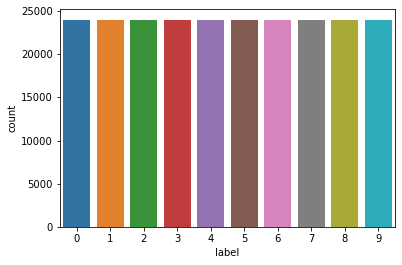

In [16]:
sns.countplot(train_data["label"])

/Users/ceciliasammut/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    24000
1    24000
2    24000
3    24000
4    24000
5    24000
6    24000
7    24000
8    24000
9    24000
Name: label, dtype: int64

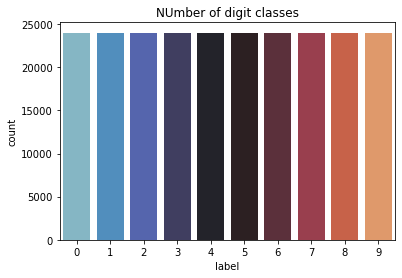

In [17]:
## Visualizing the number of class and counts in the datasets
plt.plot(figure = (16,10))
g = sns.countplot( train_data["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
train_data.label.astype('category').value_counts()

Text(0.5, 1.0, 'Digit 4')

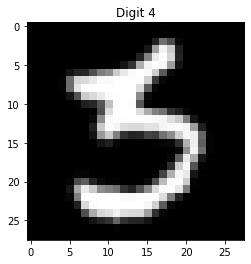

In [18]:
# Plotting some samples as well as converting into matrix

four = train_data.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

In [19]:
# average feature values
round(train_data.drop('label', axis=1).mean(), 2)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
779    0.0
780    0.0
781    0.0
782    0.0
783    0.0
Length: 784, dtype: float64

In [20]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)

(240000, 785)


In [21]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (240000, 784)
test_data: (40000, 784)


In [22]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

Need to here to set up for optimal model

Below is running optiomal model

In [24]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9767083333333333 

[[7165    2   32    5   13   11   13    1   13    7]
 [   0 7185   15    1    8    2    7    5    6    1]
 [  21    7 7023   34   18    4   12   13   20    5]
 [  12    6   91 7044    2   41    1   22   43    5]
 [   6    3   83    0 7118   16   24   10   10   53]
 [  14    7   65   66   15 6890   17    5   22   22]
 [  21    7   32    0    4   17 7053    0    6    1]
 [   1   19   49    9   31    7    0 7051    7   62]
 [  18   19   62   35   14   44   17   13 6882   29]
 [  10   13   26   24   70   13    1   45   14 6912]] 

